In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [22]:
advertising=pd.read_csv('/content/Advertising.csv')

In [23]:
advertising.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [24]:
advertising.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [25]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [26]:
advertising.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [27]:
advertising.shape

(200, 5)

In [28]:
advertising.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [31]:
x=advertising['TV']
y=advertising['Sales']

<function matplotlib.pyplot.show(close=None, block=None)>

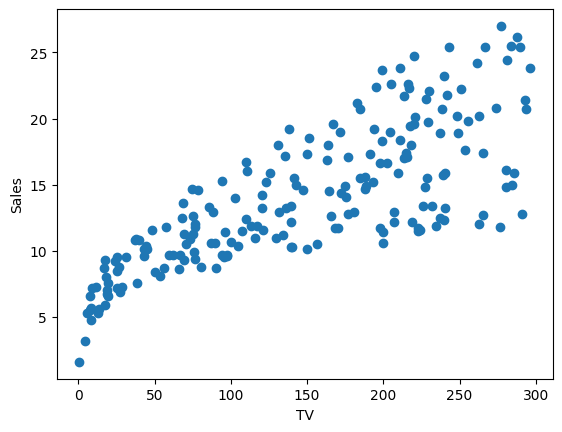

In [32]:
plt.scatter(advertising.TV,advertising.Sales)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show

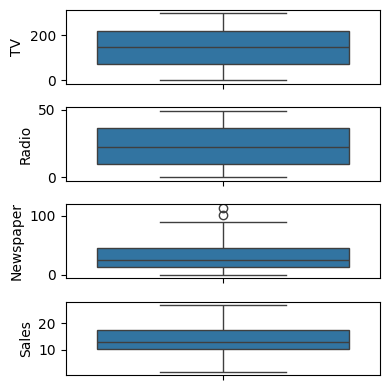

In [33]:
fig, axs = plt.subplots(4, figsize=(4,4))
plt1=sns.boxplot(advertising['TV'],ax=axs[0])
plt2=sns.boxplot(advertising['Radio'],ax=axs[1])
plt3=sns.boxplot(advertising['Newspaper'],ax=axs[2])
plt4=sns.boxplot(advertising['Sales'],ax=axs[3])
plt.tight_layout()

<function matplotlib.pyplot.show(close=None, block=None)>

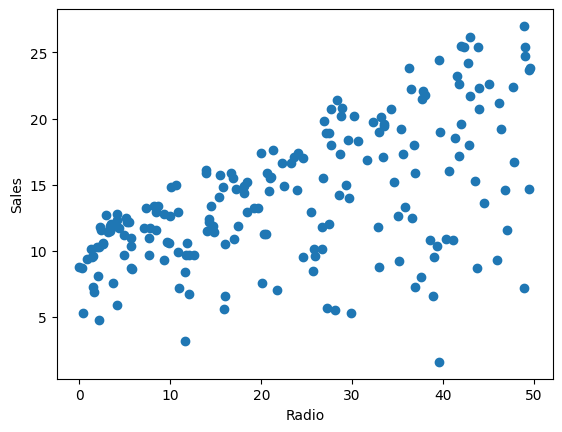

In [34]:
plt.scatter(advertising.Radio,advertising.Sales)
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

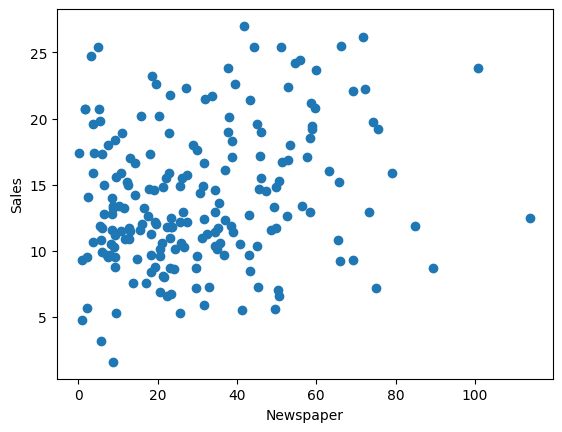

In [35]:
plt.scatter(advertising.Newspaper,advertising.Sales)
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show

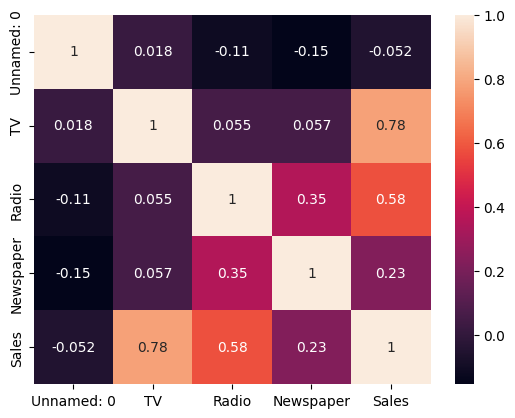

In [36]:
sns.heatmap(advertising.corr(),color='red',annot=True)
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
x_train.head()

,TV
79,116.0
197,177.0
38,43.1
24,62.3
122,224.0


In [39]:
x_train.tail()

,TV
106,25.0
14,204.1
92,217.7
179,165.6
102,280.2


In [40]:
y_train.head()

,Sales
79,11.0
197,12.8
38,10.1
24,9.7
122,11.6


In [41]:
y_train.tail()

,Sales
106,7.2
14,19.0
92,19.4
179,12.6
102,14.8


In [42]:
import statsmodels.api as sm

In [43]:
x_train_sm=sm.add_constant(x_train)

In [44]:
lr=sm.OLS(y_train,x_train_sm).fit()

In [45]:
lr.params

,0
const,7.119638
TV,0.046530


In [46]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     228.5
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           1.68e-32
Time:                        08:35:51   Log-Likelihood:                -415.93
No. Observations:                 160   AIC:                             835.9
Df Residuals:                     158   BIC:                             842.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1196      0.530     13.446      0.0

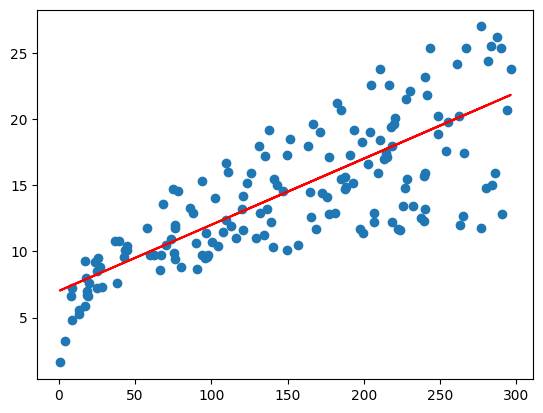

In [47]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 7.0071 + 0.05*x_train, 'r')  # Here significance value is 0.05 and 7.0071 is constant,coefficient
plt.show()

In [48]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

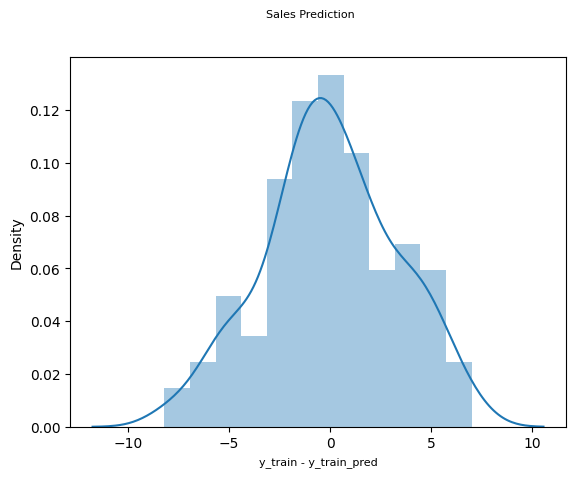

In [49]:
fig = plt.figure()
sns.distplot(res, bins =12)
fig.suptitle('Sales Prediction', fontsize = 8)
plt.xlabel('y_train - y_train_pred', fontsize = 8)
plt.show()

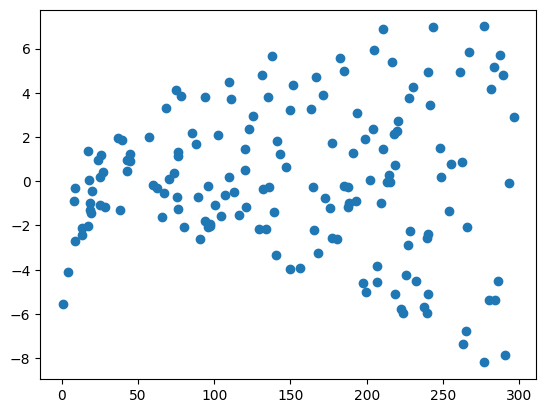

In [50]:
plt.scatter(x_train,res)
plt.show()

In [51]:
x_test_sm = sm.add_constant(x_test)
y_pred = lr.predict(x_test_sm)
y_pred.head()

,0
95,14.717944
15,16.211548
30,20.748197
158,7.664036
128,17.370139


In [52]:
y_test_sm = sm.add_constant(y_test)
x_pred = lr.predict(y_test_sm)
x_pred.head()

,0
95,7.905991
15,8.161904
30,8.115375
158,7.459305
128,8.268923


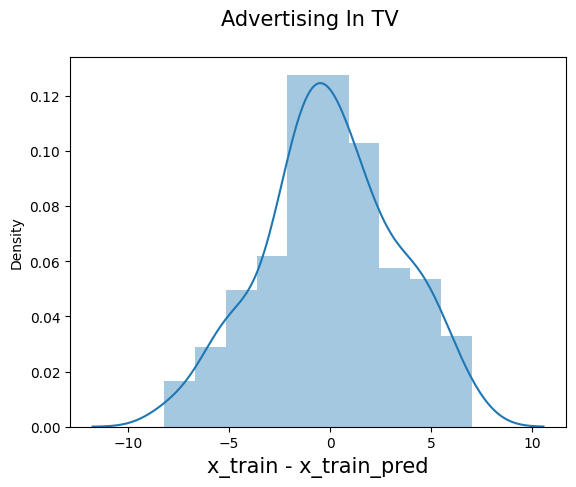

In [53]:
fig = plt.figure()
sns.distplot(res, bins =10)
fig.suptitle('Advertising In TV', fontsize = 15)
plt.xlabel('x_train - x_train_pred', fontsize = 15)
plt.show()

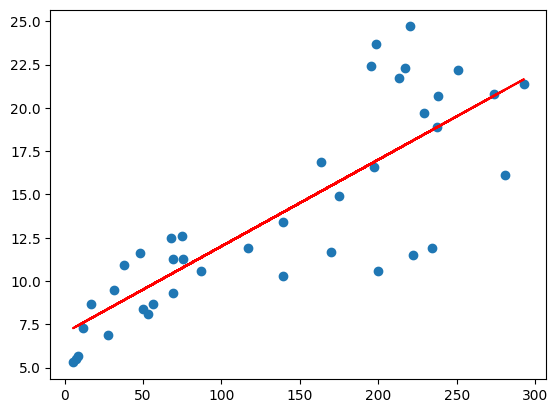

In [54]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 7.0071 + 0.05 * x_test, 'r') # Here we are coefficient and significance
plt.show()